# RocketPy Simulation
This notebook was generated using Rocket-Serializer, a RocketPy tool to convert simulation files to RocketPy simulations
The notebook was generated using the following parameters file: `TestFolder\parameters.json`


In [ ]:
%pip install rocketpy<=2.0


In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, TrapezoidalFins, EllipticalFins, RailButtons, NoseCone, Tail, Parachute
import datetime


## Environment


In [2]:
env = Environment()
env.set_location(latitude=28.61, longitude=-80.6)
env.set_elevation(0.0)


Optionally, you can set the date and atmospheric model


In [3]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
# env.set_atmospheric_model(type='Forecast', file='GFS')


Gravity Details

Acceleration of gravity at surface level:    9.7803 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5379 m/s²


Launch Site Details

Launch Date: 2024-10-28 12:00:00 UTC
Launch Site Latitude: 28.61000°
Launch Site Longitude: -80.60000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km


Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 1013.25 hPa
Surface Temperature: 288.15 K
Surface Air Density: 1.225 kg/m³
Surface Speed of Sound: 340.29 m/s


Earth Model Details

Earth Radius at Launch site: 6378.14 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034



Gravity Model Plots


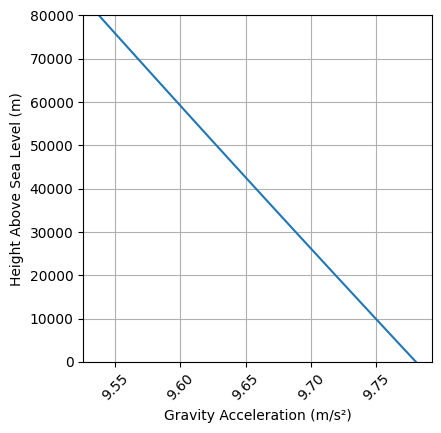



Atmospheric Model Plots


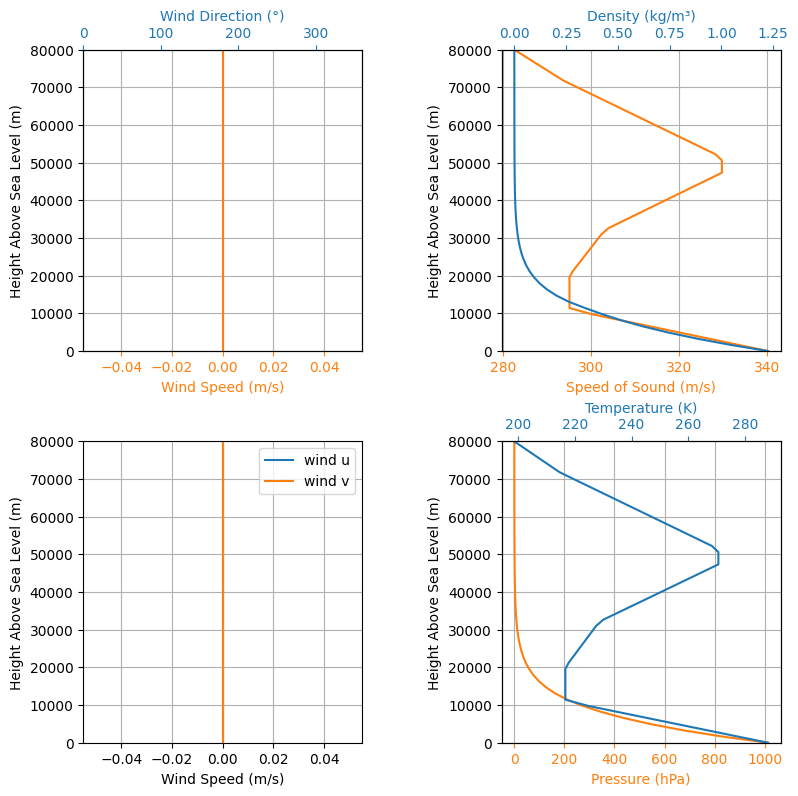

In [4]:
env.all_info()


## Motor
Currently, only Solid Motors are supported by Rocket-Serializer. If you want to use a Liquid/Hybrid motor, please use rocketpy directly.


In [13]:
motor = SolidMotor(
    thrust_source='thrust_source.csv',
    dry_mass=3.8,
    center_of_dry_mass_position=0.1,
    dry_inertia=[0.001, 0.001, 0.001],
    grains_center_of_mass_position=0.1,
    grain_number=1,
    grain_density=1070.0156556998306,
    grain_outer_radius=0.038,
    grain_initial_inner_radius=0.019,
    grain_initial_height=0.498,
    grain_separation=0.001,
    nozzle_radius=0.028499999999999998,
    nozzle_position=-0.249,
    throat_radius=0.019,
    reshape_thrust_curve=False,  # Not implemented in Rocket-Serializer
    interpolation_method='linear',
    coordinate_system_orientation='nozzle_to_combustion_chamber',
)


C:\Users\Ryan F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\rocketpy\mathutils\function.py:1631: RuntimeWarning: invalid value encountered in divide
  vector_b.extend(3 * ((y[2:] - y[1:-1]) / h[1:] - (y[1:-1] - y[:-2]) / h[:-1]))


ValueError: array must not contain infs or NaNs

In [ ]:
motor.all_info()


## Rocket
Currently, only single stage rockets are supported by Rocket-Serializer
We will start by defining the aerodynamic surfaces, and then build the rocket.


### Nosecones


In [ ]:
nosecone = NoseCone(
    length=0.2794,
    kind='Von Karman',
    base_radius=0.065405,
    rocket_radius=0.065405,
    name='0.2794',
)


### Fins
As rocketpy allows for multiple fins sets, we will create a dictionary with all the fins sets and then add them to the rocket


In [ ]:
trapezoidal_fins = {}


In [ ]:
trapezoidal_fins[0] = TrapezoidalFins(
    n=3,
    root_chord=0.1397,
    tip_chord=0.0508,
    span=0.15748,
    cant_angle=0.0,
    sweep_length= 0.046224219751807696,
    sweep_angle= None,
    rocket_radius=0.065405,
    name='Fins',
)



### Transitions (Tails)
As rocketpy allows for multiple tails, we will create a dictionary with all the tails and then add them to the rocket


In [ ]:
tails = {}


### Parachutes
As rocketpy allows for multiple parachutes, we will create a dictionary with all the parachutes and then add them to the rocket


In [ ]:
parachutes = {}


In [ ]:
parachutes[0] = Parachute(
    name='Iris Ultra Parachute [Cd 2.2 (36.0 oz) 199.9 in^3]',
    cd_s=16.052,
    trigger=164.592,
    sampling_rate=100, 
)


In [ ]:
parachutes[1] = Parachute(
    name='Apex Drouge Parachute [Cd .61 (1.9 oz) 18 in^3]',
    cd_s=0.100,
    trigger='apogee',
    sampling_rate=100, 
)


In [ ]:
rocket = Rocket(
    radius=0.065405,
    mass=14.645,
    inertia=[0.049, 0.049, 7.598],
    power_off_drag='drag_curve.csv',
    power_on_drag='drag_curve.csv',
    center_of_mass_without_motor=1.329,
    coordinate_system_orientation='nose_to_tail',
)


### Adding surfaces to the rocket
Now that we have all the surfaces, we can add them to the rocket


In [ ]:
rocket.add_surfaces(surfaces=[nosecone, trapezoidal_fins[0]], positions=[0.0, 2.56748])

In [ ]:
rocket.add_motor(motor, position= 2.182310535024822)


Adding parachutes to the rocket


In [ ]:
rocket.parachutes = list(parachutes.values())


### Rail Buttons


In [ ]:
rail_buttons = rocket.set_rail_buttons(
   upper_button_position=1.455,
   lower_button_position=2.565,
   angular_position=60.000,
)


In [ ]:
### Rocket Info
rocket.all_info()


## Flight
We will now create the flight simulation. Let's go!


In [ ]:
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=3.6576,
    inclination=90.0,
    heading=90.0,
    terminate_on_apogee=False,
    max_time=600,
)

In [ ]:
flight.all_info()


## Compare Results
We will now compare the results of the simulation with the parameters used to create it. Let's go!


In [ ]:
### OpenRocket vs RocketPy Parameters
time_to_apogee_ork = 17.947
time_to_apogee_rpy = flight.apogee_time
print(f"Time to apogee (OpenRocket): {time_to_apogee_ork:.3f} s")
print(f"Time to apogee (RocketPy):   {time_to_apogee_rpy:.3f} s")
apogee_difference = time_to_apogee_rpy - time_to_apogee_ork
error = abs((apogee_difference)/time_to_apogee_rpy)*100
print(f"Time to apogee difference:   {error:.3f} %")
print()

flight_time_ork = 82.912
flight_time_rpy = flight.t_final
print(f"Flight time (OpenRocket): {flight_time_ork:.3f} s")
print(f"Flight time (RocketPy):   {flight_time_rpy:.3f} s")
flight_time_difference = flight_time_rpy - flight_time_ork
error_flight_time = abs((flight_time_difference)/flight_time_rpy)*100
print(f"Flight time difference:   {error_flight_time:.3f} %")
print()

ground_hit_velocity_ork = -3.792
ground_hit_velocity_rpy = flight.impact_velocity
print(f"Ground hit velocity (OpenRocket): {ground_hit_velocity_ork:.3f} m/s")
print(f"Ground hit velocity (RocketPy):   {ground_hit_velocity_rpy:.3f} m/s")
ground_hit_velocity_difference = ground_hit_velocity_rpy - ground_hit_velocity_ork
error_ground_hit_velocity = abs((ground_hit_velocity_difference)/ground_hit_velocity_rpy)*100
print(f"Ground hit velocity difference:   {error_ground_hit_velocity:.3f} %")
print()

launch_rod_velocity_ork = 18.679
launch_rod_velocity_rpy = flight.out_of_rail_velocity
print(f"Launch rod velocity (OpenRocket): {launch_rod_velocity_ork:.3f} m/s")
print(f"Launch rod velocity (RocketPy):   {launch_rod_velocity_rpy:.3f} m/s")
launch_rod_velocity_difference = launch_rod_velocity_rpy - launch_rod_velocity_ork
error_launch_rod_velocity = abs((launch_rod_velocity_difference)/launch_rod_velocity_rpy)*100
print(f"Launch rod velocity difference:   {error_launch_rod_velocity:.3f} %")
print()

max_acceleration_ork = 60.063
max_acceleration_rpy = flight.max_acceleration
print(f"Max acceleration (OpenRocket): {max_acceleration_ork:.3f} m/s²")
print(f"Max acceleration (RocketPy):   {max_acceleration_rpy:.3f} m/s²")
max_acceleration_difference = max_acceleration_rpy - max_acceleration_ork
error_max_acceleration = abs((max_acceleration_difference)/max_acceleration_rpy)*100
print(f"Max acceleration difference:   {error_max_acceleration:.3f} %")
print()

max_altitude_ork = 1433.968
max_altitude_rpy = flight.apogee - flight.env.elevation
print(f"Max altitude (OpenRocket): {max_altitude_ork:.3f} m")
print(f"Max altitude (RocketPy):   {max_altitude_rpy:.3f} m")
max_altitude_difference = max_altitude_rpy - max_altitude_ork
error_max_altitude = abs((max_altitude_difference)/max_altitude_rpy)*100
print(f"Max altitude difference:   {error_max_altitude:.3f} %")
print()

max_mach_ork = 0.524
max_mach_rpy = flight.max_mach_number 
print(f"Max Mach (OpenRocket): {max_mach_ork:.3f}")
print(f"Max Mach (RocketPy):   {max_mach_rpy:.3f}")
max_mach_difference = max_mach_rpy - max_mach_ork
error_max_mach = abs((max_mach_difference)/max_mach_rpy)*100
print(f"Max Mach difference:   {error_max_mach:.3f} %")
print()

max_velocity_ork = 175.355
max_velocity_rpy = flight.max_speed
print(f"Max velocity (OpenRocket): {max_velocity_ork:.3f} m/s")
print(f"Max velocity (RocketPy):   {max_velocity_rpy:.3f} m/s")
max_velocity_difference = max_velocity_rpy - max_velocity_ork
error_max_velocity = abs((max_velocity_difference)/max_velocity_rpy)*100
print(f"Max velocity difference:   {error_max_velocity:.3f} %")
print()

max_thrust_ork = 1123.0
max_thrust_rpy = flight.rocket.motor.thrust.max
print(f"Max thrust (OpenRocket): {max_thrust_ork:.3f} N")
print(f"Max thrust (RocketPy):   {max_thrust_rpy:.3f} N")
max_thrust_difference = max_thrust_rpy - max_thrust_ork
error_max_thrust = abs((max_thrust_difference)/max_thrust_rpy)*100
print(f"Max thrust difference:   {error_max_thrust:.3f} %")
print()

burnout_stability_margin_ork = 1.553
burnout_stability_margin_rpy = flight.stability_margin(flight.rocket.motor.burn_out_time)
print(f"Burnout stability margin (OpenRocket): {burnout_stability_margin_ork:.3f}")
print(f"Burnout stability margin (RocketPy):   {burnout_stability_margin_rpy:.3f}")
burnout_stability_margin_difference = burnout_stability_margin_rpy - burnout_stability_margin_ork
error_burnout_stability_margin = abs((burnout_stability_margin_difference)/burnout_stability_margin_rpy)*100
print(f"Burnout stability margin difference:   {error_burnout_stability_margin:.3f} %")
print()

max_stability_margin_ork = 4.415
max_stability_margin_rpy = flight.max_stability_margin
print(f"Max stability margin (OpenRocket): {max_stability_margin_ork:.3f}")
print(f"Max stability margin (RocketPy):   {max_stability_margin_rpy:.3f}")
max_stability_margin_difference = max_stability_margin_rpy - max_stability_margin_ork
error_max_stability_margin = abs((max_stability_margin_difference)/max_stability_margin_rpy)*100
print(f"Max stability margin difference:   {error_max_stability_margin:.3f} %")
print()

min_stability_margin_ork = 1.185
min_stability_margin_rpy = flight.min_stability_margin
print(f"Min stability margin (OpenRocket): {min_stability_margin_ork:.3f}")
print(f"Min stability margin (RocketPy):   {min_stability_margin_rpy:.3f}")
min_stability_margin_difference = min_stability_margin_rpy - min_stability_margin_ork
error_min_stability_margin = abs((min_stability_margin_difference)/min_stability_margin_rpy)*100
print(f"Min stability margin difference:   {error_min_stability_margin:.3f} %")
print()

